In [1]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from torch.utils.data.dataloader import DataLoader
import tiktoken

from src.data_loader import load_data
from src.utils import load_config
from src import wikipedia_article_dataset
from src.models import CNN, CNNModel, MultilabelCNNModel
from src.evaluation import evaluate_model

[nltk_data] Error loading stopwords: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:1000)>


## Binary Classification

In [2]:
MAX_LENGTH = 400
BATCH_SIZE = 16

EMBEDDING_DIM = 128
NUM_FILTERS = 10
FILTER_SIZES = [3, 4, 5]
NUM_CLASSES = 2
DROPOUT = 0.5

In [3]:
config = load_config("just-load")
df = load_data(config["data_loader"], "binary")
df

,text,label
0,7 15 A.M. is the tenth episode of the American...,0
1,The Adventures of Ghosthorse and Stillborn is ...,1
2,Ancient grains are a grouping of grains and ps...,1
3,1000 Forms of Fear is the sixth studio album b...,0
4,The 41 cm 45 3rd Year Type naval gun was a 41 ...,0
...,...,...
1995,The 1917 Nueva Gerona hurricane was the most i...,0
1996,The 1879 Navy Midshipmen football team represe...,0
1997,M. Bakthavatsalam INC C.N. Annadurai DMK The f...,0
1998,"PJSC Aeroflot Russian Airlines Russian , PAO A...",1


In [4]:
X_train, X_test, y_train, y_test = train_test_split(list(df["text"]), list(df["label"]), test_size=0.2)

In [5]:
model = CNNModel(
    EMBEDDING_DIM,
    NUM_FILTERS,
    FILTER_SIZES,
    NUM_CLASSES,
    MAX_LENGTH,
    DROPOUT
)

In [6]:
model.fit(X_train, y_train, 0.001, 3, BATCH_SIZE)

Epoch: 0, loss: 0.7169863837957382
Epoch: 1, loss: 0.48313517510890963
Epoch: 2, loss: 0.3975849585980177


In [7]:
predictions = model.predict(X_test)

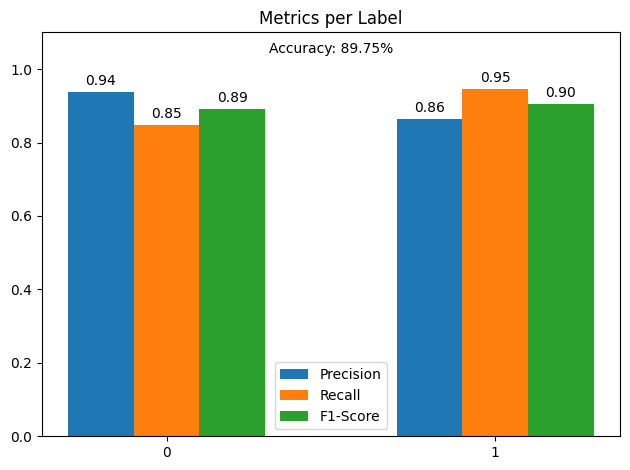

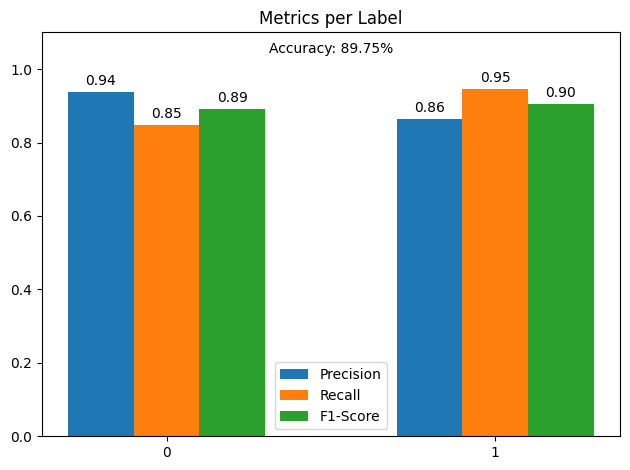

In [8]:
evaluate_model(model, X_test, y_test)

## Multilabel Classification

In [9]:
config = load_config("just-load")
df = load_data(config["data_loader"], "multilabel")
df

,Unnamed: 0,text,advert,coi,fanpov,pr,resume
0,901,Antanas Andrijauskas born 3 November 1948 is a...,0,0,0,0,1
1,224,"Adaptive Insights, a Workday company, formerly...",1,1,0,0,0
2,509,Frank Albo is a Canadian architectural histori...,1,0,0,0,0
3,202,Activant Solutions Inc. was a privately held A...,1,0,0,0,0
4,96,Arcot Ramasamy Lakshmanaswami Mudhaliyar Matri...,1,0,0,0,0
...,...,...,...,...,...,...,...
995,995,"Apache Aries, a Blueprint Container implementa...",1,0,0,0,0
996,194,Acreage Holdings formerly known as High Street...,1,0,0,0,0
997,537,Victor Alexeeff is a Canadian composer. He beg...,0,0,0,0,1
998,211,"Aculab is a privately held, UK based limited c...",1,0,0,0,0


In [10]:
model = MultilabelCNNModel(
    EMBEDDING_DIM,
    NUM_FILTERS,
    FILTER_SIZES,
    MAX_LENGTH
)

texts = df["text"].tolist()

columns = ["advert", "coi", "fanpov", "pr", "resume"]
labels = df[columns].values.tolist()

In [11]:
model.fit(texts, labels, learning_rate=0.01, num_epochs=3, batch_size=16)

Epoch 1/3, Loss: 0.4390
Epoch 2/3, Loss: 0.3227
Epoch 3/3, Loss: 0.3227


In [12]:
predictions = model.predict(texts)

In [13]:
for i, col in enumerate(columns):
    pred_col = [p[i] for p in predictions]
    label_col = [l[i] for l in labels]

    print(f"Classification Report for {col}:")
    print(classification_report(label_col, pred_col))

Classification Report for advert:
              precision    recall  f1-score   support

           0       1.00      0.05      0.10       195
           1       0.81      1.00      0.90       805

    accuracy                           0.81      1000
   macro avg       0.91      0.53      0.50      1000
weighted avg       0.85      0.81      0.74      1000

Classification Report for coi:
              precision    recall  f1-score   support

           0       0.91      1.00      0.95       912
           1       0.00      0.00      0.00        88

    accuracy                           0.91      1000
   macro avg       0.46      0.50      0.48      1000
weighted avg       0.83      0.91      0.87      1000

Classification Report for fanpov:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       942
           1       0.00      0.00      0.00        58

    accuracy                           0.94      1000
   macro avg       0.47      

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  